# Examples of the EMI paper
In this Jupyter notebook are replicated the case studies withthe code and graph from the EMI paper (TODO add DOI).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from emagpy import Problem

datadir = 'examples/'
outputdir = 'figures/'

/media/jkl/data/phd/tmp/emagpy/src/emagpy


## CS vs Maxwell on synthetic conductive models - Paul 
- Graph 1: homogeneous conductivity increase (X) vs apparent modelled (Y) for CS and FS 
- Graph 2: different height (X) vs apparent modelled (Y) for CS and FS 

## Calibrated and not calibrated (Boxford ERT line) - Paul

## Sharp and smooth inversions on Boxford transect/Devon’s data on saprolite for interface - Guillaume 

## Synthetic about noise and inversion – Guillaume 
- Similar to Paul’s thesis graph: adding noise make the inversion less reliable 
- Graph with increasing noise level on a 2D model ? 

In [ ]:
k = Problem()
k.models = 
k.forward()


k.invert()

#TODO

## Time-lapse field application - Guillaume 
- Soil moisture content evolution vs EMI timelapse inversion 
- Quebec data, warren data or synthetic 

In [51]:
from datetime import datetime
k = Problem()
k.createTimeLapseSurvey([
#                        datadir + 'timelapse-wheat/161028.csv',
#                        datadir + 'timelapse-wheat/170302.csv',
                        datadir + 'timelapse-wheat/170316.csv',
#                        datadir + 'timelapse-wheat/170403.csv',
                        datadir + 'timelapse-wheat/170427.csv',
#                        datadir + 'timelapse-wheat/170516.csv',
                        datadir + 'timelapse-wheat/170601.csv'])

# just look at a few measurements for better graph
for s in k.surveys:
    s.df = s.df[:30]
    s.name = datetime.strptime('20' + s.name, '%Y%m%d').strftime('%Y-%m-%d')

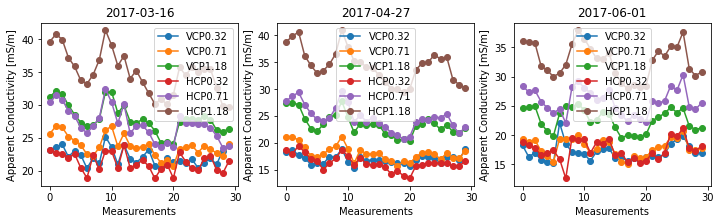

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
for i, s in enumerate(k.surveys):
    ax = axs[i]
    k.show(i, ax=ax)
    ax.set_title(s.name)

In [54]:
# inversion
#TODO

## Different types of inversions

In [6]:
# Gauss-Newton
k1 = Problem()
k1.createSurvey(datadir + 'cover-crop/coverCrop.csv')
k1.surveys[0].df = k1.surveys[0].df[:10]
k1.invertGN()

# Minimize
k2 = Problem()
k2.createSurvey(datadir + 'cover-crop/coverCrop.csv')
k2.surveys[0].df = k2.surveys[0].df[:10]
k2.invert()

# MCMC
k3 = Problem()
k3.createSurvey(datadir + 'cover-crop/coverCrop.csv')
k3.surveys[0].df = k3.surveys[0].df[:10]
k3.invertMCMC()

ks = [k1, k2, k3]

Survey 1/1
10 measurements inverted
Survey 1/1
10 measurements inverted (10 converged)
bounds chosen: [(100.0, 2.0), (100.0, 2.0), (100.0, 2.0)]
Survey 1/1

Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 parameters:
(6, 6)
(11, 11)
(16, 16)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
2 input vectors with 3 parameters
Generating 12 parameters:
(3, 3)
(5, 5)
(7, 7)
(9, 9)
(11, 11)
(13, 13)
End of sampling
Best run at 17 of 100 (best like=-1.46944) with parameter set:
[35.73243784 31.56329283 58.52503556]
Duration:0.17 s
1/10 inverted (ok)
Starting the ROPE algotrithm with 100 repetitions...
Initialize database...
* Database file 'invertSCEUA.csv' created.
5 input vectors with 3 parameters
Generating 12 pa

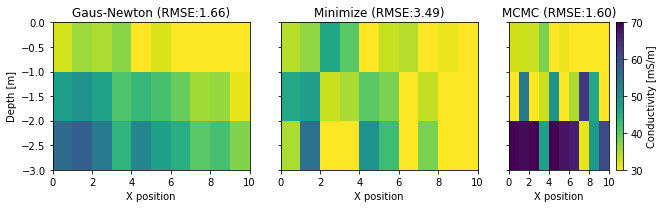

In [14]:
# graph
methods = ['Gaus-Newton', 'Minimize', 'MCMC']
fig, axs = plt.subplots(1, 3, figsize=(10,3), sharex=True, sharey=True)
for i, k in enumerate(ks):
    ax = axs[i]
    k.showResults(ax=ax, vmin=30, vmax=70)
    if i < 2:
        fig.axes[-1].remove()
    if i > 0:
        ax.set_ylabel('')
    rmse = k.getRMSE()
    ax.set_title('{:s} (RMSE:{:.2f})'.format(methods[i], rmse['all'].values[0]))
fig.savefig(outputdir + 'inversion-types.jpg', dpi=500)
#TODO add colorbar for all graph as additional axis

## Capabilities of EMagPy

Deleted 13/60 measurements
dataset shrink of 2 measurements
VCP0.32 0.59 * x + 1.71 (R=0.35)
VCP0.71 0.53 * x + 2.34 (R=0.54)
VCP1.18 0.40 * x + 6.66 (R=0.24)
HCP0.32 0.38 * x + 6.51 (R=0.52)
HCP0.71 0.22 * x + 10.44 (R=0.22)
HCP1.18 0.06 * x + 13.11 (R=0.10)
Transformation to LIN ECa for CMD Mini-Explorer at F-0m calibration
found 766 / 3792 crossing points
Survey 1/1
45 measurements inverted (45 converged)
number of nan 0 0


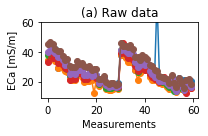

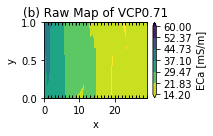

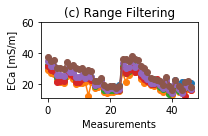

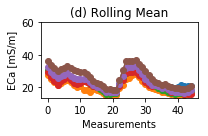

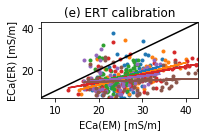

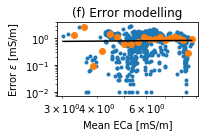

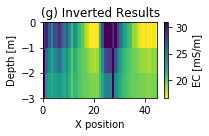

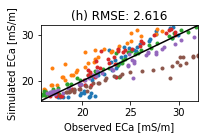

In [49]:
k = Problem()
k.createSurvey(datadir + 'cover-crop/coverCrop.csv')
k.surveys[0].df = k.surveys[0].df[:60]
#k.coils = k.coils[:3] # just VCP
#k.surveys[0].coils = k.surveys[0].coils[:3]
figsize = (3,2)

# data display
fig, ax = plt.subplots(figsize=figsize)
k.show(ax=ax, vmax=60)
ax.get_legend().remove()
ax.set_title('(a) Raw data')
ax.set_ylabel('ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-show.jpg')

# data map
fig, ax = plt.subplots(figsize=figsize)
k.showMap(coil=k.coils[1], ax=ax, vmax=60, contour=True, pts=True)
ax.set_title('(b) Raw Map of VCP0.71')
fig.axes[-1].set_ylabel('ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-showMap.jpg')


# filter range
fig, ax = plt.subplots(figsize=figsize)
k.keepBetween(vmin=10, vmax=40)
k.show(ax=ax, vmax=60)
ax.get_legend().remove()
ax.set_title('(c) Range Filtering')
ax.set_ylabel('ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-filterRange.jpg')

# filter pick
#fig, ax = plt.subplots()
#k.show(ax=ax, vmax=60)
#fig.savefig(outputdir + 'cap-filterPick.jpg')

# filter smooth
fig, ax = plt.subplots(figsize=figsize)
k.rollingMean()
k.show(ax=ax, vmax=60)
ax.set_title('(d) Rolling Mean')
ax.get_legend().remove()
ax.set_ylabel('ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-smooth.jpg')


# ERT calibration
fig, ax = plt.subplots(figsize=figsize)
k.calibrate(datadir + 'calib/dfeca.csv', datadir + 'calib/dfec.csv', ax=ax)
ax.get_legend().remove()
ax.set_title('(e) ERT calibration')
fig.tight_layout()
fig.savefig(outputdir + 'cap-calib.jpg')

# EMI error modelling
k2 = Problem() # need other dataset as cover-crop doesn't have cross-over points
k2.importGF(fnameLo = datadir + 'potatoes/potatoesLo.dat')
k2.convertFromNMEA()
fig, ax = plt.subplots(figsize=figsize)
k2.crossOverPoints(ax=ax, coil=k.coils[1])
ax.set_title('(f) Error modelling')
ax.get_legend().remove()
ax.set_xlabel('Mean ECa [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-error.jpg')


# Inverse results
fig, ax = plt.subplots(figsize=figsize)
k.invert()
k.showResults(ax=ax)
ax.set_title('(g) Inverted Results')
fig.axes[-1].set_ylabel('EC [mS/m]')
fig.tight_layout()
fig.savefig(outputdir + 'cap-showResults.jpg')

# Inverse quality
fig, ax = plt.subplots(figsize=figsize)
k.showOne2one(ax=ax)
ax.get_legend().remove()
ax.set_title('(h) ' + ax.get_title())
fig.tight_layout()
fig.savefig(outputdir + 'cap-one2one.jpg')

found 0 / 4721 crossing points


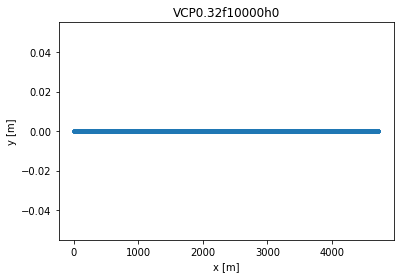

In [43]:
k2.plotCrossOverMap()